Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.dates as mdates

Read Data

In [2]:
stock_Samsung = pd.read_csv('../Dataset/Samsung_clean.csv')
stock_Samsung

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010,16060,16180,16000,16180,11978.36523,11950800
1,1/5/2010,16520,16580,16300,16440,12170.84668,27925850
2,1/6/2010,16580,16820,16520,16820,12452.17090,22948850
3,1/7/2010,16820,16820,16260,16260,12037.59082,22107950
4,1/8/2010,16400,16420,16120,16420,12156.04102,14777550
...,...,...,...,...,...,...,...
3887,10/23/2025,96800,98500,96300,96500,96500.00000,18488581
3888,10/24/2025,97900,99000,97700,98800,98800.00000,18801925
3889,10/27/2025,101300,102000,100600,102000,102000.00000,22169970
3890,10/28/2025,100900,101000,99100,99500,99500.00000,20002282


Analyse

Describe

In [3]:
stock_Samsung.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3892.000000,3892.000000,3892.00000,3892.000000,3892.000000,3.892000e+03
mean,44166.202467,44584.884378,43733.76927,44149.110997,38655.124815,1.525759e+07
std,20873.663201,21049.019128,20683.64255,20852.961252,21396.878777,7.659612e+06
min,13680.000000,13940.000000,13440.00000,13600.000000,10192.408200,0.000000e+00
25%,25880.000000,26040.000000,25620.00000,25840.000000,19832.600100,1.029284e+07
50%,44300.000000,44800.000000,43775.00000,44275.000000,36999.623050,1.347776e+07
75%,60200.000000,60700.000000,59600.00000,60125.000000,56936.723635,1.831249e+07
max,101300.000000,102000.000000,100600.00000,102000.000000,102000.000000,9.030618e+07


In [4]:
CV = stock_Samsung['Close'].std() / stock_Samsung['Close'].mean()
print("Coefficient of Variation: ", CV)


Coefficient of Variation:  0.47233026399462164


In [5]:
# Skewness
skewness = stats.skew(stock_Samsung['Close'])
print("Skewness: ", skewness)

Skewness:  0.34918159776146407


In [6]:
# Kurtosis
kurtosis = stats.kurtosis(stock_Samsung['Close'])
print("Kurtosis: ", kurtosis)

Kurtosis:  -1.085706383977773



Visualization

Initial Close Values

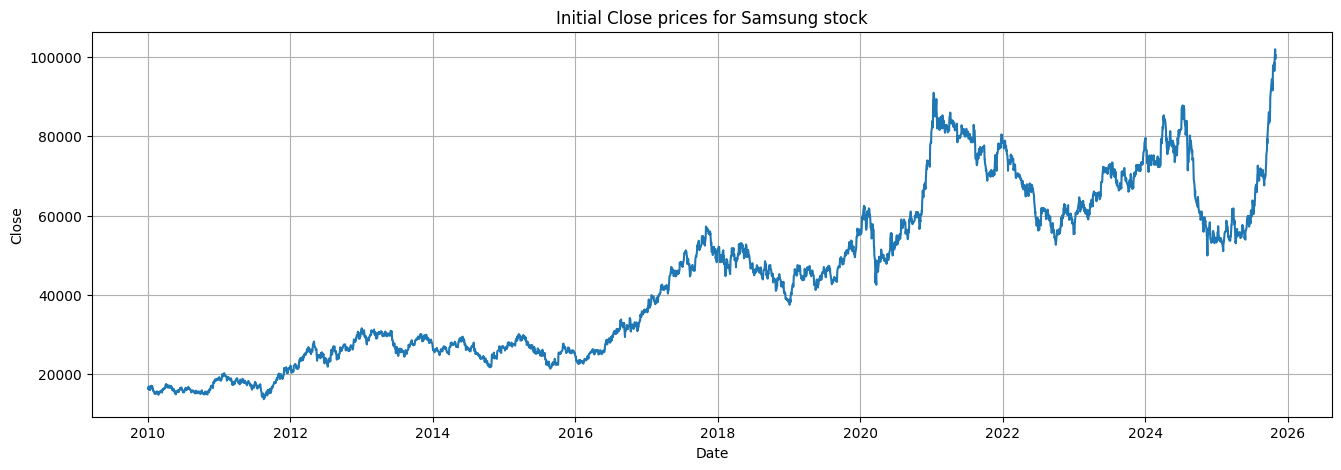

In [7]:
# Convert the 'Date' column to datetime format
stock_Samsung['Date'] = pd.to_datetime(stock_Samsung['Date'])

# Set the 'Date' column as the index value
stock_Samsung = stock_Samsung.set_index(pd.DatetimeIndex(stock_Samsung['Date'].values))

# Delete Date from Dataframe
stock_Samsung = stock_Samsung.drop('Date', axis=1)


plt.figure(figsize=(16,5))

plt.plot(stock_Samsung.index, stock_Samsung['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for Samsung stock')
plt.grid()
plt.show()

Histogram

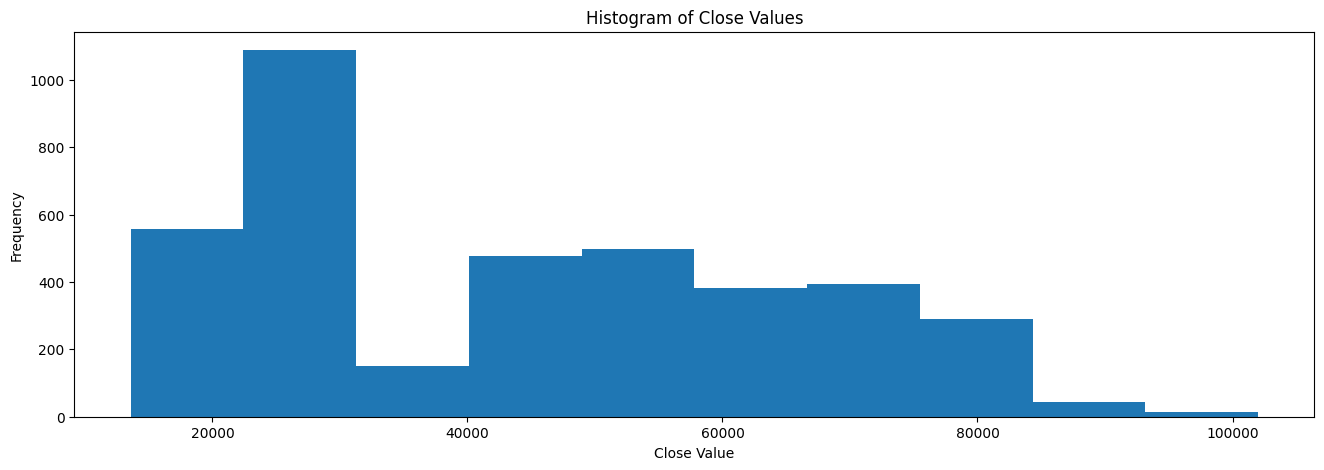

In [8]:
plt.figure(figsize=(16,5))
plt.hist(stock_Samsung['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

Boxplot

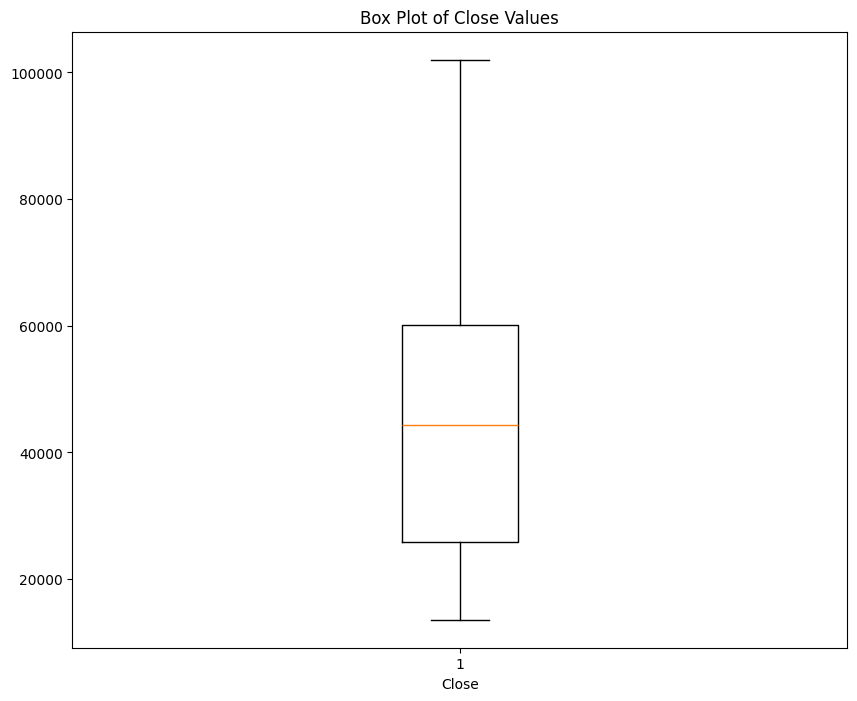

In [9]:
plt.figure(figsize=(10,8))
plt.boxplot(stock_Samsung['Close'])
plt.title("Box Plot of Close Values")
plt.xlabel("Close")
plt.show()

Visualizing the components of our time series: Trend, Seasonality, and Noise

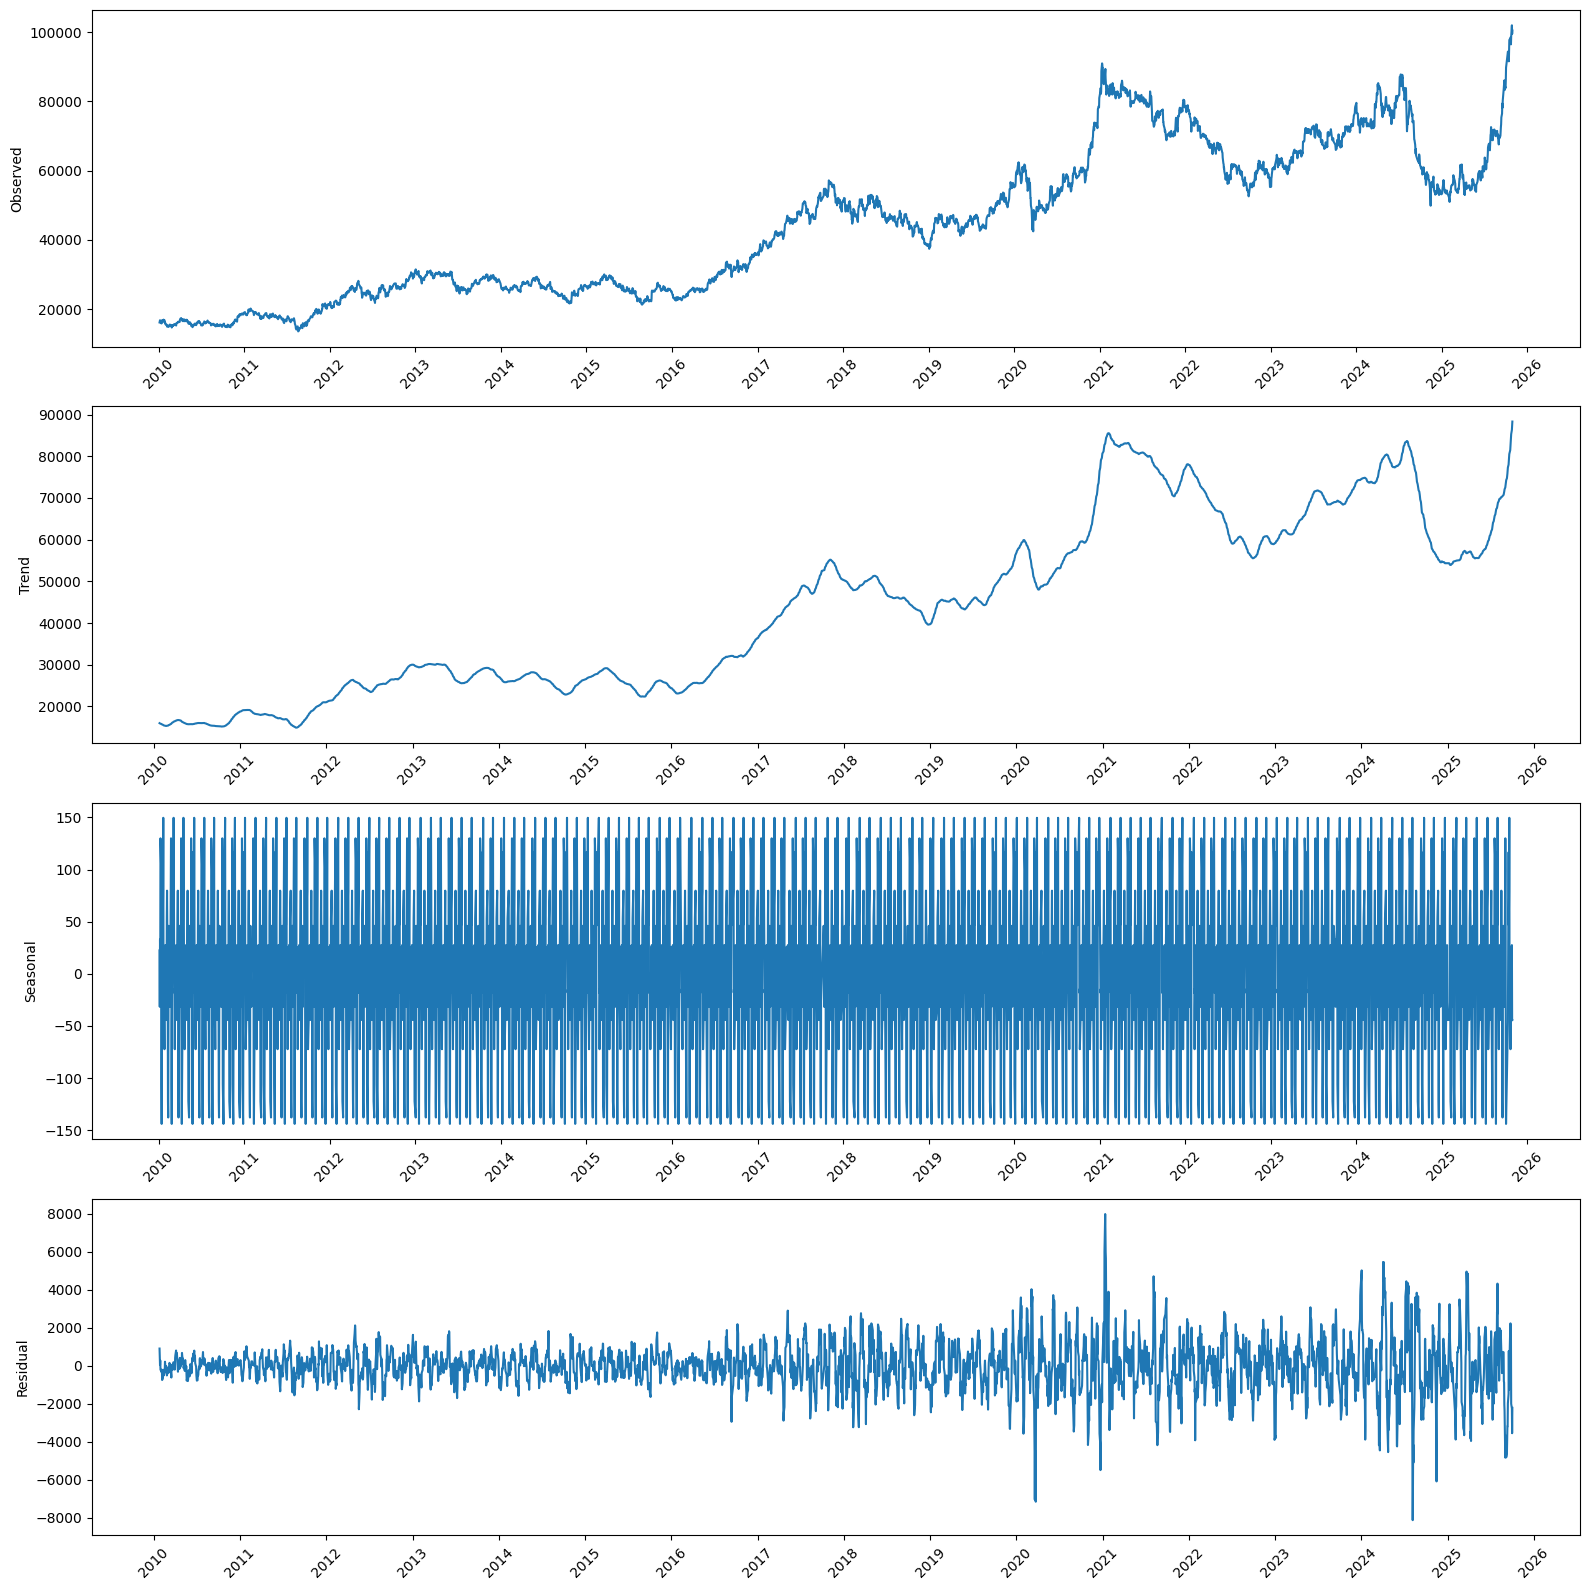

In [10]:
decomposition = sm.tsa.seasonal_decompose(stock_Samsung['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4, 1, figsize=(16, 16))

ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')

ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')

ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')

ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')

for a in ax:
    a.xaxis.set_major_locator(mdates.YearLocator(1))  
    a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    a.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
